# Límites del método de Euler

El método de Euler puede fracasar de manera muy grave. Consideremos el sistema de un péndulo simple (sin resistencia del aire), en el que tomamos la aproximación de ángulo pequeño $\sin \theta \approx \theta$. En ese caso, la ecuación diferencial ews

$$\frac{d^{2} \theta}{dt^{2}} + \frac{g}{l} \theta = 0$$

Que si definimos $v_{\theta} = \frac{d \theta}{dt} $, la convertimos en el siguiente sistema de ecuaciones diferenciales

$$\dot{\theta} = v_{\theta}$$

$$\dot{v_{\theta}} = -\frac{g}{l} \sin \theta$$

Esta ecuación es (más o menos) equivalente a un oscilador armónico simple.

In [1]:
import matplotlib.pyplot as plt
from math import sin
import numpy as np
from EDO import *
from EditNotebook import * 

In [2]:
class Pendulo_Simple:
    
    def __init__(self, g, l):

        self.l, self.g = l, g
        self.omega = -g/l
        
    def __call__(self,u,t):
        theta, dtheta = u 
        return np.array([dtheta, self.omega*sin(theta)])

In [3]:
Sistema = Pendulo_Simple(9.8, 10)

solver = Euler(Sistema)
solver.condiciones_iniciales([np.pi/8,0], [0,30], 0.1)
theta,t = solver.SolveEDO()	

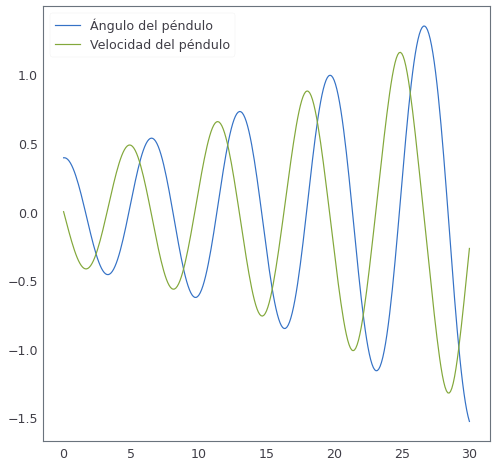

In [4]:
Edit()
plt.plot(t, theta[:,0], label = "Ángulo del péndulo")
plt.plot(t, theta[:,1], label = "Velocidad del péndulo")
plt.grid() ; plt.legend() ; plt.show()

Podemos observar que la solución está mal, la amplitud empieza a crecer cuando el tiempo aumento. Si graficamos el espacio de fases

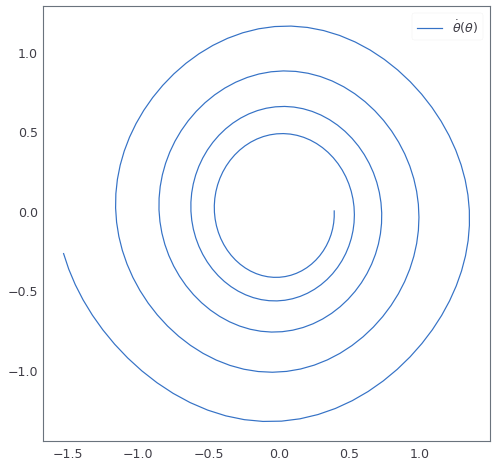

In [5]:
plt.plot(theta[:,0], theta[:,1], label = r"$\dot{\theta} (\theta)$")
plt.grid() ; plt.legend() ; plt.show()

Es claro que el método no funciona de manera correcta. Observamos que la amplitud aumenta. Esto se vuelve más drástico a analizar la energía del sistema.

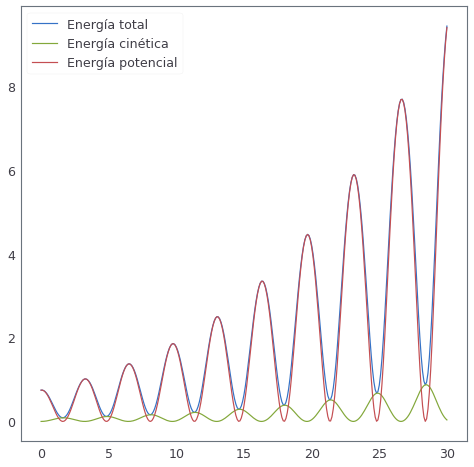

In [6]:
m = 1
K = (1/2*m)*(theta[:,1])**2
U = m*Sistema.g*(1 - np.cos(theta[:,0]))
E = K + U
plt.plot(t, E, label = "Energía total")
plt.plot(t,K, label = "Energía cinética")
plt.plot(t,U, label="Energía potencial" )
plt.grid() ; plt.legend() ; plt.show()

Pareciera que la energía mecánica no se conserva, lo que sabemos debería pasa pues no hay fuerzas de fricción u otras fuerzas no conservativas en el sistema.

Queda claro que la solución obtenida por el método de Euler para el péndulo simple tiene un error demasiado grande. Por lo tanto debemos utilizar otros métodos que nos permitan resolver el sistema.

# Otros métodos simples para EDOs

## Método de Euler Cromer


La primera modificación sencilla que podemos realizar para el caso de un solo sistema de dos ecuaciones diferenciales de la siguiente forma

$$\dot{x} = v(t)$$
$$\dot{v} = f(x,t)$$

El método consiste en actualizar primero la velocidad utilizando el método de Euler 

$$v_{i} = v_{i -1} + hf(x_{i-1}, t_{i -1})$$

Y utilizar la nueva velocidad para actualizar después la posición, también con un paso de Euler

$$x_{i} = x_{i -1} + hv_{i}$$

A este método se le conoce como el **método de Euler-Cromer**

## Método del punto medio

Una desventaja del método de Euler-Cromer es que solo se puede utilizar para sistemas de ecuaciones con una forma especifíca (que es suficiente para nosotros pues dicha forma encaja con la mayoria de las ecuaciones de movimiento). Es posible extenderlo para resolver sistemas de ecuaciones más grandes, actualizando primero todas ls velocidad y luego usando esos valores para todas las posiciones.

De cualquier manera, nos gustaria tener otros métodos mejores que el de Euler para un sistema de ecuaciones diferenciales arbitrario. Recordando la forma general de un sistema de ecuaciones diferenciales.

$$\dot{\vec{x}} = f(\vec{x},t)$$

que mediante el método de Euler se discretiza en el siguiente esquema

$$\vec{x} (t + h) = \vec{x} (t) + f(\vec{x} (t), t)$$

Una mejora, derivada de la regla de integración rectangular centrada, consisten en no evaluar $f$ en $(\vec{x},t)$, si no en $(\vec{x} (t + h/2), t + h/2)$, con lo que la regla se veria

$$\vec{x} (t + h) = \vec{x} (t) + h f(\vec{x} (t + h/2), t + h/2)$$

Sin embargo, un problema es que no conocemos $\vec{x} (t + h/2)$. Sin embargo, podemos aproximarlos un paso de Euler

$$\vec{x} (t + h/2) = \vec{x} + \frac{h}{2} f(\vec{x}, t)$$

Usando dicha aproximación, podemos reescribrir la rega del paso como

$$\vec{x} (t + h) = \vec{x} (t) + h f( \vec{x} + \frac{h}{2} f(\vec{x}, t) , t + h/2)$$ 

Utilizando índices para notar la dependencia temporal, queda de la forma

$$x_{i} = x_{i -1} + h f(x_{i -1} + \frac{h}{2}f(x_{i-1},t_{i-1}), t_{i-1} + h/2 )$$

Para simplificar la notación, podemos mejor definir una variable auxiliar $k_1$, para representar $\vec{x}(t + h/2)$ 

$$k_{1} = x_{i -1} + \frac{h}{2}f(x_{i-1},t_{i-1})$$

Y asi escribimos el método como

$$k_1 = x_{i-1} + \frac{h}{2} f(x_{i-1},t_{i-1})$$

$$x_{i} = x_{i-1} +hf(k1,t_{i-1} + h/2)$$

A este método se le conoce como **método (explícito) del punto medio**


## Método de Heun

Siguiendo la misma idea del método del punto medio, podemos ahora utilizar la regla de intregración trapezoidal sobre la función $f$ para obtener la siguiente expresión

$$x(t + h) = x(t) + \frac{1}{2} \left[ f(x,t) + f(x + hf(x,t), t + h ) \right]$$

Nuevamente, para simplificar la notación, definimos una variable auxiliar $k_1$ como

$$k_1 = x(t) = h f(x(t) , t)$$

Y así nuestro método se puede reescribir como

$$k_1 = x(t) +  h f(x(t) , t)$$

$$x(t + h) = x(t) + \frac{h}{2} (f(x,t) + f(k_1, t +h ))$$

Usando índices para la dependencia temporal, tenemos

$$k_1 = x_{i-1}  + hf(x_{i-1}, t_{i-1}) $$
$$x_{i} = x_{i-1} + \frac{h}{2} (f(x_{i-1},t_{i-1}) + f(k_1, t_{i}))$$

A este método se le conoce como **método de Heun**
